In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
# Set the style for prettier plots
sns.set_theme(style="whitegrid")

# --- Load the Data ---
try:
    df = pd.read_csv("perfs.csv")
    print("Successfully loaded perfs.csv with {} records.".format(len(df)))
    # Display the first few rows to confirm it's loaded correctly
    display(df.head())
except FileNotFoundError:
    print("Error: perfs.csv not found. Please run the simulation's benchmark mode first.")
    df = None # Set df to None so other cells don't crash

Successfully loaded perfs.csv with 140 records.


,RunID,Iteration,Integrator,Interaction,NumSystems,ParticlesPerSystem,StepsPerRecording,KernelTime_ms,GIPS,MUPS
0,1762970135237190929,0,Leapfrog,RepulsiveForce,24,2048,10,0.064752,15538.4,7590.81
1,1762970135237190929,1,Leapfrog,RepulsiveForce,24,2048,10,0.065694,15315.6,7481.96
2,1762970135237190929,2,Leapfrog,RepulsiveForce,24,2048,10,0.051066,19702.8,9625.19
3,1762970135237190929,3,Leapfrog,RepulsiveForce,24,2048,10,0.059602,16881.0,8246.70
4,1762970135237190929,4,Leapfrog,RepulsiveForce,24,2048,10,0.041688,24135.0,11790.40



--- Average Performance per Configuration ---


,Integrator,Interaction,ParticlesPerSystem,StepsPerRecording,Avg_GIPS,Avg_MUPS,label
0,Leapfrog,RepulsiveForce,224,10,336.7717,1510.1854,L-R-224p-10s
1,Leapfrog,RepulsiveForce,1224,10,6461.5120,5283.3280,L-R-1224p-10s
2,Leapfrog,RepulsiveForce,2048,10,19419.4083,9486.7687,L-R-2048p-10s
3,Leapfrog,RepulsiveForce,3224,10,46635.6000,14469.6100,L-R-3224p-10s
4,Leapfrog,RepulsiveForce,4224,10,81281.4400,19247.3390,L-R-4224p-10s


/tmp/ipykernel_214092/2518279192.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='Avg_GIPS', data=avg_performance, ax=ax1, palette='viridis')
/tmp/ipykernel_214092/2518279192.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='Avg_MUPS', data=avg_performance, ax=ax2, palette='plasma')


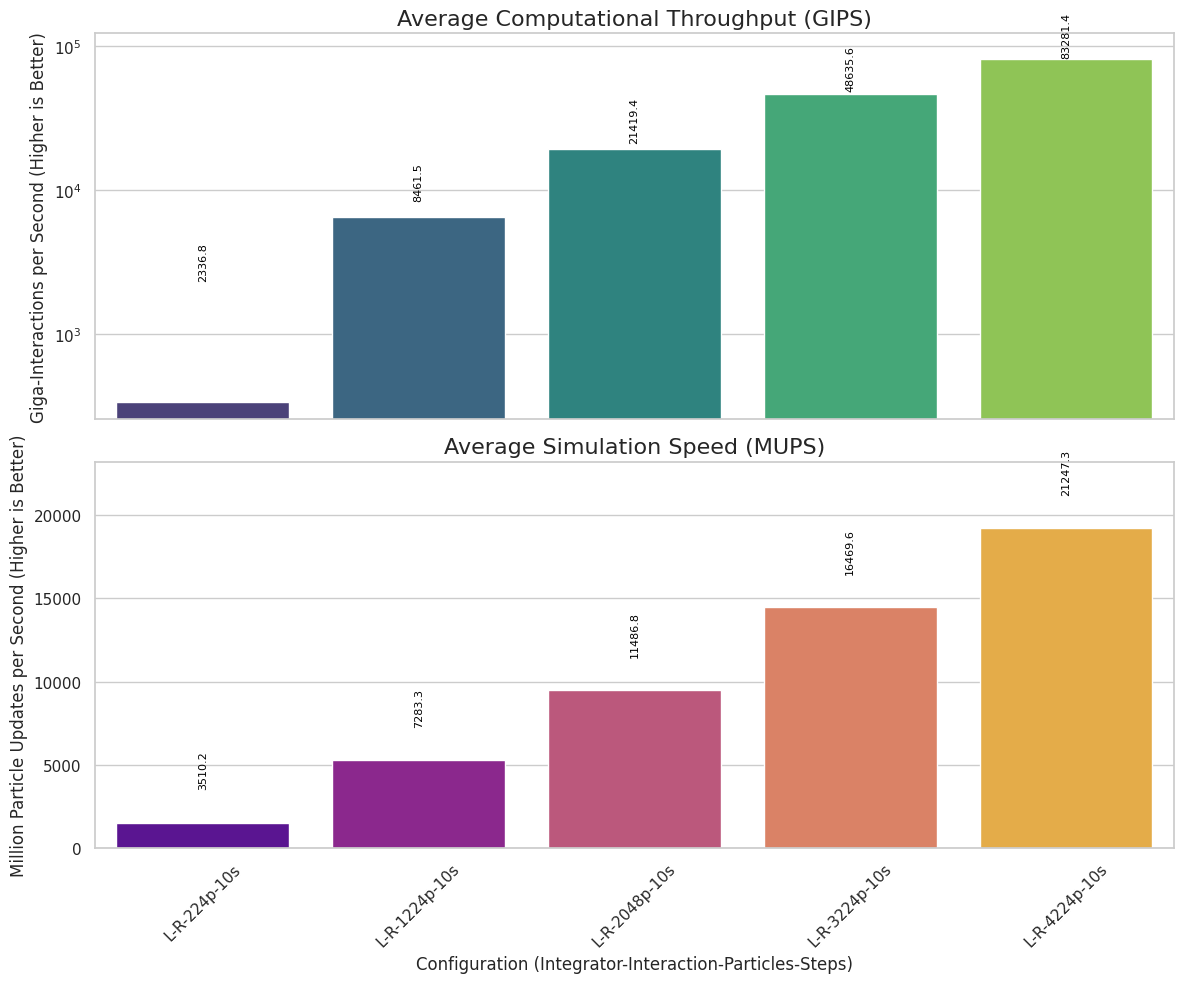

In [ ]:
if df is not None:
    # --- 1. Group Data and Calculate Averages ---
    # (This part is unchanged)
    avg_performance = df.groupby([
        'Integrator', 
        'Interaction', 
        'ParticlesPerSystem', 
        'StepsPerRecording'
    ]).agg(
        Avg_GIPS=('GIPS', 'mean'),
        Avg_MUPS=('MUPS', 'mean')
    ).reset_index()

    avg_performance['label'] = avg_performance['Integrator'].str.slice(0, 1) + '-' + \
                               avg_performance['Interaction'].str.slice(0, 1) + '-' + \
                               avg_performance['ParticlesPerSystem'].astype(str) + 'p-' + \
                               avg_performance['StepsPerRecording'].astype(str) + 's'
    
    print("\n--- Average Performance per Configuration ---")
    display(avg_performance)

    # --- 2. Create the Bar Plot ---
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    # Plot for GIPS
    sns.barplot(x='label', y='Avg_GIPS', data=avg_performance, ax=ax1, palette='viridis')
    ax1.set_title('Average Computational Throughput (GIPS)', fontsize=16)
    ax1.set_ylabel('Giga-Interactions per Second (Higher is Better)')
    ax1.tick_params(axis='x', rotation=45)

    # Plot for MUPS
    sns.barplot(x='label', y='Avg_MUPS', data=avg_performance, ax=ax2, palette='plasma')
    ax2.set_title('Average Simulation Speed (MUPS)', fontsize=16)
    ax2.set_ylabel('Million Particle Updates per Second (Higher is Better)')
    ax2.set_xlabel('Configuration (Integrator-Interaction-Particles-Steps)', fontsize=12)
    ax2.tick_params(axis='x', rotation=45)
    
    # ==========================================================
    #         NEW CODE TO ADD LABELS TO THE BARS
    # ==========================================================
    
    # --- Function to add labels to a bar plot ---
    def add_bar_labels(ax):
        # ax.patches contains the rectangles (the bars) of the plot
        for bar in ax.patches:
            # Get the bar's coordinates and height
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_height() + 2000
            
            # Format the text (e.g., to one decimal place)
            label = f"{y:.1f}"
            
            # ax.text() places text at a specified coordinate on the plot
            ax.text(
                x, y, label, 
                ha='center',      # Horizontal alignment
                va='bottom',      # Vertical alignment (places text just above the bar)
                rotation=90,      # Make the text vertical
                fontsize=8,       # Adjust font size for readability
                color='black'
            )

    # Apply the function to both of our subplots
    add_bar_labels(ax1)
    add_bar_labels(ax2)

    # Adjust y-limits to give space for the labels
    ax1.set_ylim(top=ax1.get_ylim()[1] * 1.15) # Add 15% margin at the top
    ax2.set_ylim(top=ax2.get_ylim()[1] * 1.15)
    
    # ==========================================================
    
    plt.tight_layout()
    plt.show()


--- Performance Scaling with System Size ---


,ParticlesPerSystem,Avg_GIPS,Std_GIPS
0,224,336.7717,73.016904
1,1224,6461.5120,1098.276711
2,2048,19419.4083,4425.400753
3,3224,46635.6000,8718.137755
4,4224,81281.4400,19457.522734


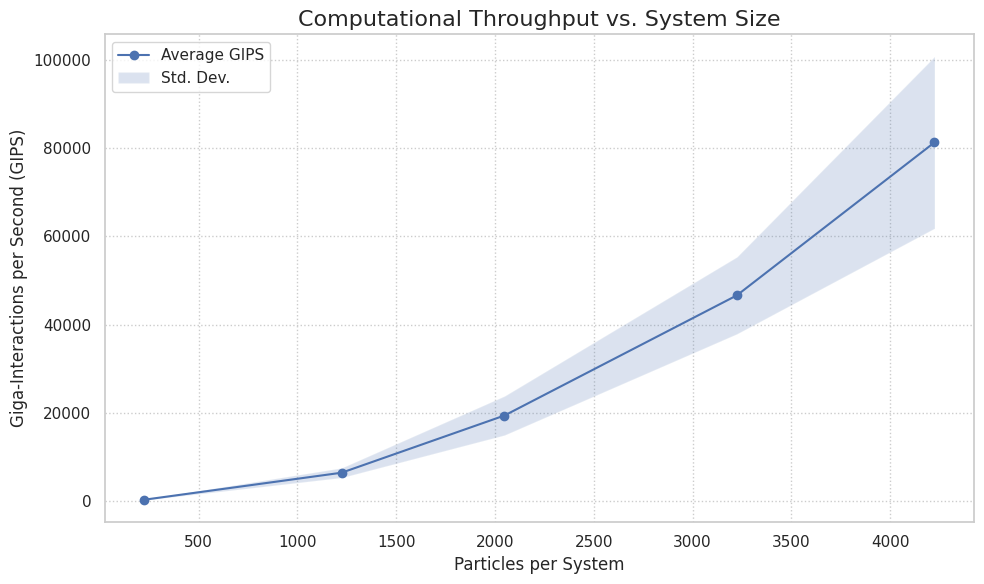

In [20]:
if df is not None:
    # --- 1. Group by Particle Count and Calculate Averages ---
    scaling_data = df.groupby('ParticlesPerSystem').agg(
        Avg_GIPS=('GIPS', 'mean'),
        Std_GIPS=('GIPS', 'std')
    ).reset_index()

    print("\n--- Performance Scaling with System Size ---")
    display(scaling_data)

    # --- 2. Create the Line Plot ---
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(scaling_data['ParticlesPerSystem'], scaling_data['Avg_GIPS'], marker='o', linestyle='-', label='Average GIPS')
    
    # Optional: Add an error band to show the standard deviation
    ax.fill_between(
        scaling_data['ParticlesPerSystem'],
        scaling_data['Avg_GIPS'] - scaling_data['Std_GIPS'],
        scaling_data['Avg_GIPS'] + scaling_data['Std_GIPS'],
        alpha=0.2, label='Std. Dev.'
    )

    ax.set_title('Computational Throughput vs. System Size', fontsize=16)
    ax.set_xlabel('Particles per System', fontsize=12)
    ax.set_ylabel('Giga-Interactions per Second (GIPS)', fontsize=12)
    ax.legend()
    ax.grid(True, which='both', linestyle=':')
    plt.tight_layout()
    plt.show()


--- Analyzing Stability for RunID: 1762970643392315836 ---


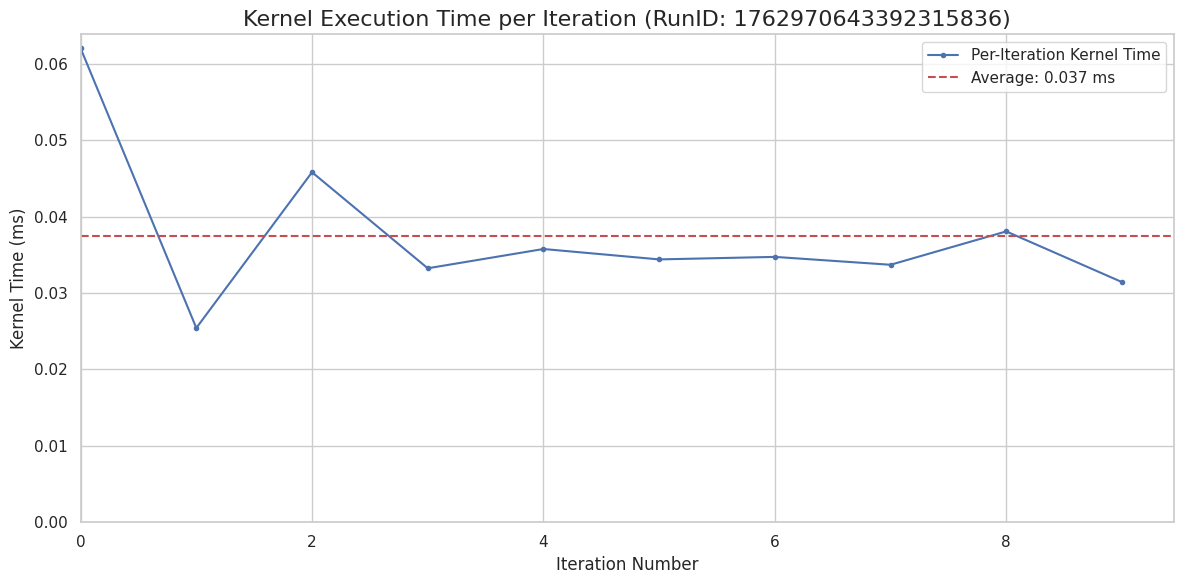

In [21]:
if df is not None:
    # --- 1. Select Data for a Single Run ---
    # We'll automatically pick the most recent RunID from the file.
    last_run_id = df['RunID'].iloc[-1]
    single_run_data = df[df['RunID'] == last_run_id].copy()

    if not single_run_data.empty:
        print(f"\n--- Analyzing Stability for RunID: {last_run_id} ---")

        # --- 2. Create the Line Plot ---
        fig, ax = plt.subplots(figsize=(12, 6))

        ax.plot(single_run_data['Iteration'], single_run_data['KernelTime_ms'], 
                marker='.', linestyle='-', label='Per-Iteration Kernel Time')

        # Calculate and plot the average as a horizontal line for reference
        avg_time = single_run_data['KernelTime_ms'].mean()
        ax.axhline(avg_time, color='r', linestyle='--', label=f'Average: {avg_time:.3f} ms')
        
        ax.set_title(f'Kernel Execution Time per Iteration (RunID: {last_run_id})', fontsize=16)
        ax.set_xlabel('Iteration Number', fontsize=12)
        ax.set_ylabel('Kernel Time (ms)', fontsize=12)
        ax.legend()
        ax.set_xlim(left=0)
        ax.set_ylim(bottom=0)

        plt.tight_layout()
        plt.show()